# **STUDENT PERFORMANCE PREDICTION**

### Project: Student Performance Prediction using Ensemble Learning (Random Forest)

**Models Used:**

1. Logistic Regression
2. Metrics to check model performance
3. Decision Tree
4. Random Forest (Ensemble Learning - Bagging)
5. Support Vector Machine (SVM)
6. K-Nearest Neighbors (KNN)
7. Voting Ensemble (Hard & Soft Voting) and Tool: Scikit-Learn

In [49]:
# pandas -> data handling, matplotlib -> graphs
import pandas as pd
import matplotlib.pyplot as plt

# train_test_split -> split data, LabelEncoder -> text to number, StandardScaler -> scale values
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Import different machine learning models
from sklearn.linear_model import LogisticRegression    # Linear classification model
from sklearn.tree import DecisionTreeClassifier         # Tree-based model
from sklearn.ensemble import RandomForestClassifier     # Multiple trees combined
from sklearn.ensemble import VotingClassifier           # Ensemble voting model
from sklearn.svm import SVC                             # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier      # Nearest neighbor model

# Metrics to check model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [50]:
# Load the CSV dataset
df = pd.read_csv("student_performance.csv")
print(df.head())

   Age  Gender  Study_Hours  Attendance  Previous_Score Internet_Access  \
0   18    Male          3.0          85              72             Yes   
1   19  Female          2.0          78              65             Yes   
2   18    Male          1.0          60              45              No   
3   20  Female          4.0          90              80             Yes   
4   21    Male          0.5          55              40              No   

  Extra_Classes Parent_Education Stress_Level Final_Result  
0           Yes         Graduate          Low         Pass  
1            No       HighSchool       Medium         Pass  
2            No       HighSchool         High         Fail  
3           Yes     PostGraduate          Low         Pass  
4            No       HighSchool         High         Fail  


In [51]:
print("\n" + "="*20 + " DATA INFO " + "="*20)
print(df.info())

print("\n" + "="*20 + " TARGET DISTRIBUTION " + "="*20)
print(df["Final_Result"].value_counts())


==================== DATA INFO ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               25 non-null     int64  
 1   Gender            25 non-null     object 
 2   Study_Hours       25 non-null     float64
 3   Attendance        25 non-null     int64  
 4   Previous_Score    25 non-null     int64  
 5   Internet_Access   25 non-null     object 
 6   Extra_Classes     25 non-null     object 
 7   Parent_Education  25 non-null     object 
 8   Stress_Level      25 non-null     object 
 9   Final_Result      25 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.1+ KB
None

==================== TARGET DISTRIBUTION ====================
Final_Result
Pass    14
Fail    11
Name: count, dtype: int64


Count how many students passed or failed and show bar chart

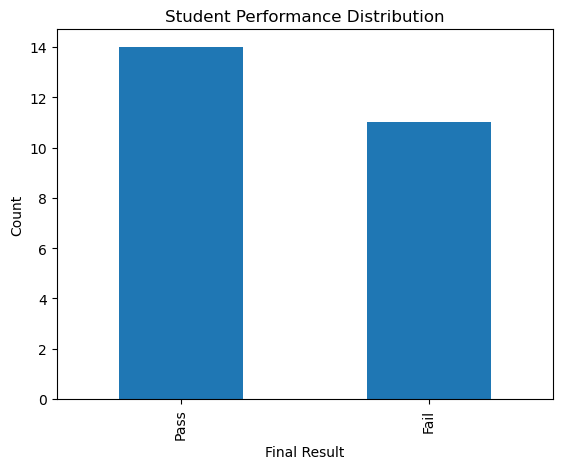

In [52]:
# Visualization of the target variable
df["Final_Result"].value_counts().plot(kind="bar", title="Student Performance Distribution")
plt.xlabel("Final Result")
plt.ylabel("Count")
plt.show();

## DATA PREPROCESSING

In [53]:
# Encoding categorical variables
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = encoder.fit_transform(df[col]);

## FEATURE & TARGET SELECTION

In [54]:
# X contains all input features by removing the target column (Final_Result)
X = df.drop("Final_Result", axis=1)

# y contains the target/output values that the model will learn to predict
y = df["Final_Result"];

## TRAIN-TEST SPLIT
    Split the dataset into training and testing parts.

In [55]:
# X_train -> input data used to train the model
# X_test -> input data used to test the model
# y_train -> correct answers for training data
# y_test -> correct answers for testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# test_size=0.2 means 20% data for testing and 80% for training
# random_state=42 keeps the split same every time
# stratify=y keeps class distribution same in train and test data
print("Train sixe:",X_train.shape);
print("Test sixe:",X_test.shape);

Train sixe: (20, 9)
Test sixe: (5, 9)


## 2. Feature Scaling & Model Creation :
    This step is vital because your features (like Age vs. Previous_Score) have different ranges. Scaling them prevents larger numbers from dominating the model's math.

In [56]:
# Create the SVM model
model = SVC(kernel="linear", random_state=42) # SVM uses scaled student data to separate PASS and FAIL accurately.

# Create a StandardScaler object to scale numerical feature values for SVM & KNN
scaler = StandardScaler()

# Learn scaling from training data and scale the training features
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to testing data (without relearning)
X_test_scaled = scaler.transform(X_test);

## 3. Step.1 INDIVIDUAL MODEL : MODEL COMPARISOM

In [57]:
# Step 1: DEFINE MACHINE LEARING MODELS:

models = {
    #Logistic Regression
    # max_iter = 1000 means:
    # Allow the model up to 1000 iterations to converge
    # Prevents "convergence warning" for LArger datsets
    "LogisticRegression": LogisticRegression(max_iter=1000),

    # Decision Tree
    # No scaling required
    "Decision Tree": DecisionTreeClassifier(),

    # Random Forest (Ensemble Learning - Bagging)
    # n_estimators=100 means:
    # -> Use 100 decision trees for stronger & stable prediction
    "Random Forest": RandomForestClassifier(n_estimators=100),

    # Support Vector Machine (SVM)
    # Linear kernel is simple & works well for small datasets
    "SVM": SVC(kernel="linear"),

    # K-Nearest Neighbors
    # n_neighbors=5 means:
    # -> Model looks at 5 nearest data points to make prediction
    "KNN": KNeighborsClassifier(n_neighbors=5)
};


## 4. Step 2: Model Performance Evaluation


============== MODEL PERFORMANCE ====
Model: LogisticRegression
Accuracy: 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
---------------------------------------
Model: Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
---------------------------------------
Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
---------------------------------------
Model: SVM
Accuracy: 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
---------------------------------------
Model: KNN
Accuracy: 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
---------------------------------------


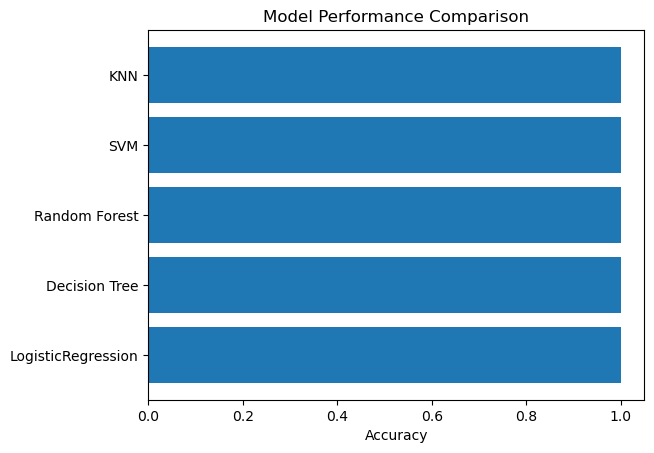

In [58]:
print("\n============== MODEL PERFORMANCE ====")

# VERY IMPORTANT: create empty lists FIRST
model_names = []
accuracies = []

# Loop  through each model 
for name, model in models.items():
    print("Model:", name)

    # Moodel that NEED scaled data
    if name in ["LogisticRegression","SVM","KNN"]:
        model.fit(X_train_scaled,y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Performace metrics
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("---------------------------------------")

    # Store results for graph
    model_names.append(name)
    accuracies.append(acc)

# ---------- GRAPH ----------
plt.figure()
plt.barh(model_names, accuracies)
plt.xlabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show();

## 4. Step 3: Voting Ensemble (Final Model)

In [ ]:
# STEP 3: VOTING ENSEMBLE (FINAL MODEL)

# Voting Ensemble combines predictions from multiple models
# Final result is decided by majority vote or probability
hard_voting = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000)),
        ("dt", DecisionTreeClassifier()),
        ("rf", RandomForestClassifier()),
        ("svm", SVC(probability=True)), # probability=True needed
        ("knn", KNeighborsClassifier())
    ],
    voting="hard"
);

# ----------------- SOFT VOTING -----------------

# Uses prediction probabilities
# More reliable when models are well-calibrated
soft_voting = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000)),
        ("dt", DecisionTreeClassifier()),
        ("rf", RandomForestClassifier()),
        ("svm", SVC(probability=True)), # REQUIRED for soft voting
        ("knn", KNeighborsClassifier())
    ],
    voting="soft"
);


## 5. Step 4: Final Results & Comparison


========== VOTING ENSEMBLE RESULTS =========
Hard Voting Accuracy: 1.0
Soft Voting Accuracy: 1.0


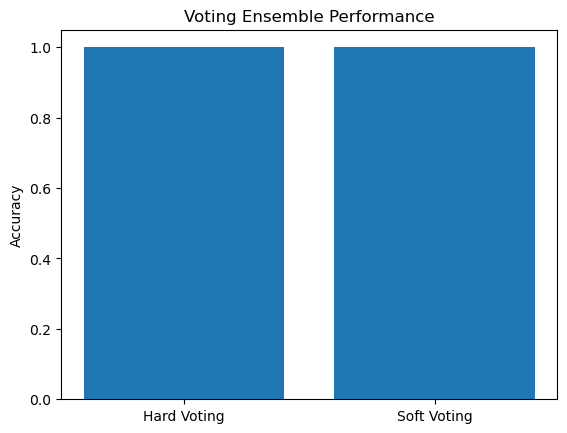

In [72]:
# Train both voting models (use scaled data for safety)
hard_voting.fit(X_train_scaled, y_train)
soft_voting.fit(X_train_scaled, y_train)

# Predict results
hard_pred = hard_voting.predict(X_test_scaled)
soft_pred = soft_voting.predict(X_test_scaled)

# -------------------- FINAL RESULTS -------------------
print('\n========== VOTING ENSEMBLE RESULTS =========')
print("Hard Voting Accuracy:", accuracy_score(y_test, hard_pred))
print("Soft Voting Accuracy:", accuracy_score(y_test, soft_pred));

# --------------------- FINAL RESULTS BAR CHART ----------------------

plt.figure();
plt.bar(["Hard Voting", "Soft Voting"],
        [accuracy_score(y_test, hard_pred),
         accuracy_score(y_test, soft_pred)])
plt.ylabel("Accuracy")
plt.title("Voting Ensemble Performance")
plt.show()


## 5. Final Prediction on New Data

In [76]:
# Create new student data
new_student = pd.DataFrame([{
    "Age": 20,               # student age
    "Previous_Score": 65,    # last exam score
    "Gender": 1,             # gender (number form)
    "Study_Hours": 6,        # daily study hours
    "Attendance": 85,        # attendance percentage
    "Internet_Access": 1,    # has internet (yes/no)
    "Extra_Classes": 1,      # takes extra classes (yes/no)
    "Parent_Education": 2,   # parent education level
    "Stress_Level": 1        # stress level
}]);

# Scale the data using the previously defined scaler
new_student = new_student[X.columns] # match columns with training data
new_student_scaled = scaler.transform(new_student) # scale data

# Predict result
final_prediction = soft_voting.predict(new_student_scaled) # predict results

print("FINAL PREDICTION:", "PASS" if final_prediction[0] == 1 else "FAIL") # Show result

FINAL PREDICTION: PASS
